In [27]:
#!pip install -I keras==2.2.4 tensorflow==1.13.1

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from math import pi, ceil, floor
from numpy import sqrt
from pprint import pprint
from tqdm import tqdm_notebook as tqdm
from glob import glob

from cvtools import *
from train import *
from vision import *

In [45]:
model = load_model('res/models/cnn-best.h5')

found 2 circles, 16 dobbles


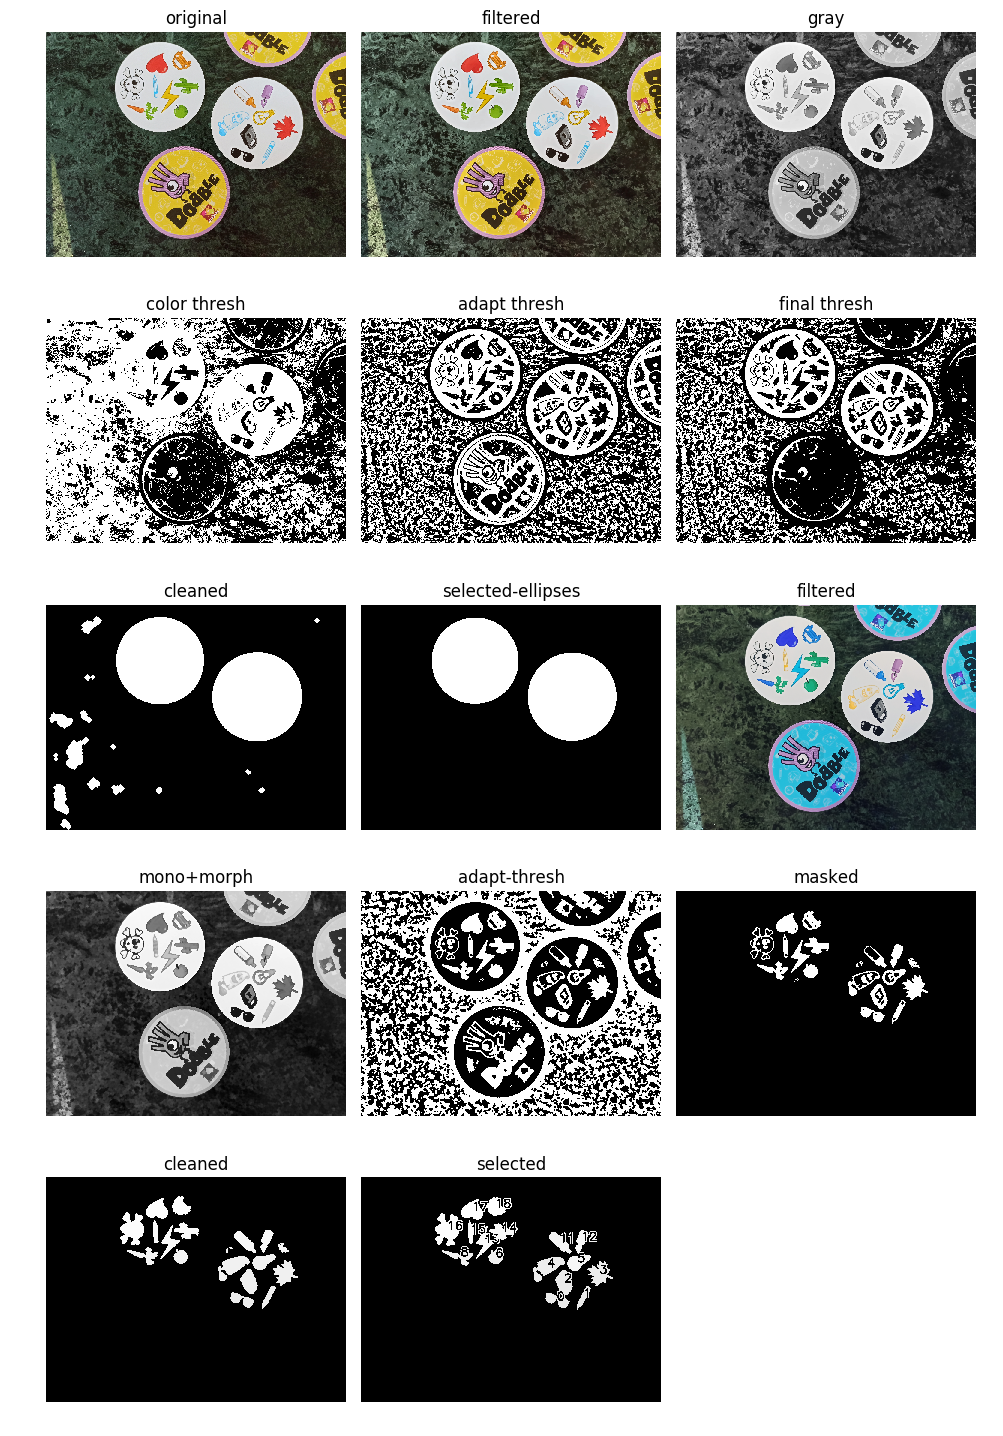

In [48]:
fig = show_process('res/all/55.jpg')
fig.show()

/home/max/Documents/dobre-dobble/cvtools.py:165: RuntimeWarning: divide by zero encountered in log10
  hu = -np.sign(hu) * np.log10(np.abs(hu))
/home/max/Documents/dobre-dobble/cvtools.py:165: RuntimeWarning: invalid value encountered in multiply
  hu = -np.sign(hu) * np.log10(np.abs(hu))
/home/max/.local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


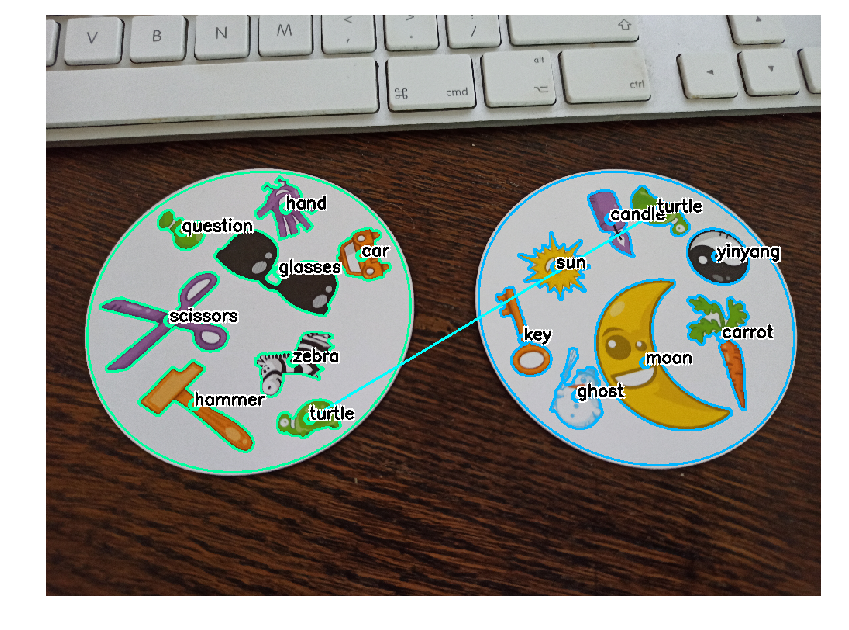

In [52]:
solution = solve_dobble('res/all/83.jpg', model, outlines=True, text=True)
fig = imshow_fig(cv2ski(solution))
fig.show()

In [31]:
#X, y, _ = load_dataset(dobble_features, base_path='res/classes')
#model = make_dobble_model()
#history = train_model(model, X, y, epochs=100, batch_size=32, save_path='res/models/cnn.h5')
#fig = plot_loss(history)
#fig.savefig('traincurve.png')
#fig.show()

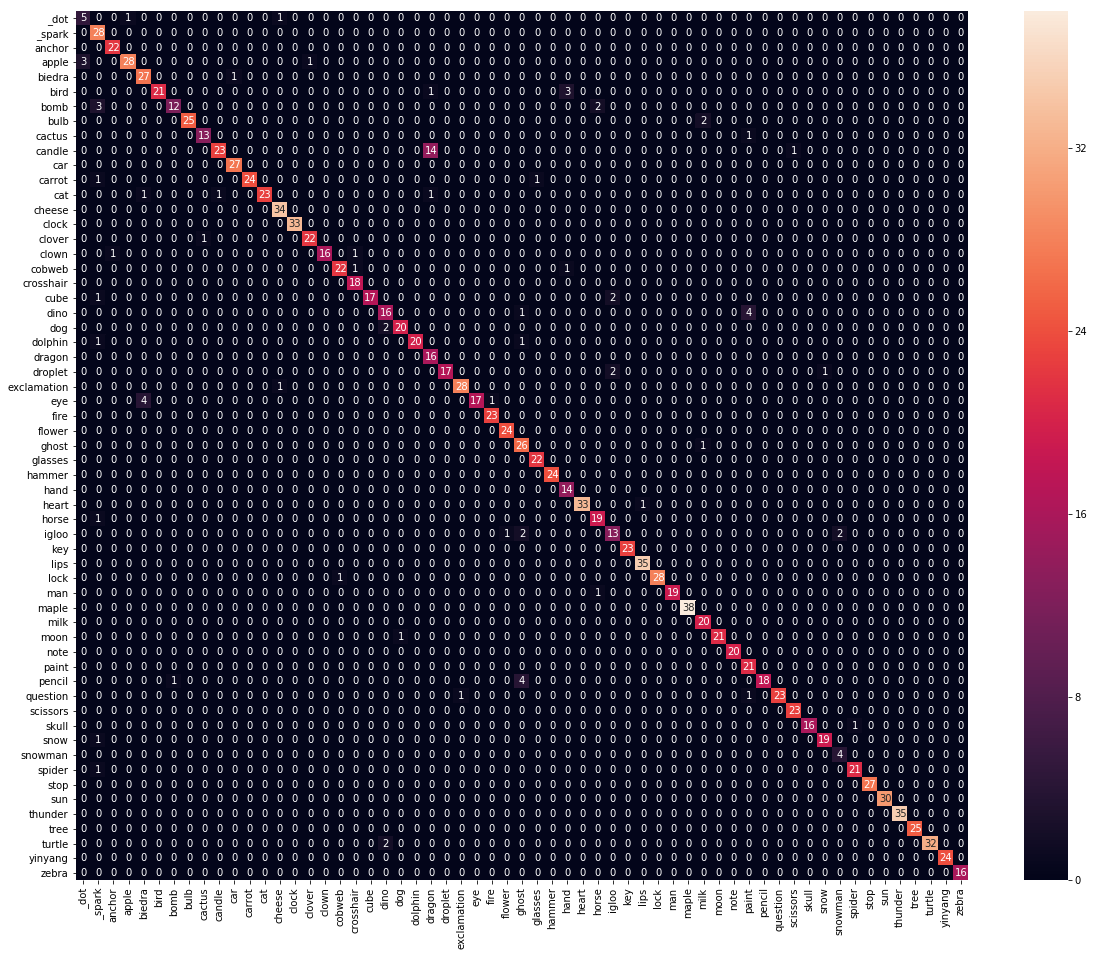

In [37]:
X_tr, X_te, y_tr, y_te = data_split(X, y)
X_, y_ = X_tr, y_tr
labels_ = enc.categories_[0]
cm = confusion_matrix(decode_Y(y_), predict_cnn(model, X_), labels=labels_)
plot_confusion_matrix(cm, labels=labels_)

In [36]:
#export_cutouts('res/all', 'res/cutouts')
#cutouts = load_cutouts('res/classes')
#export_solution_all()
#exprot_process_all()

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 38, 38, 126)       3528      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 36, 36, 126)       143010    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 18, 18, 126)       0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 18, 18, 126)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 16, 256)       290560    
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 256)         0         
__________